In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
bank = pd.read_excel("bank-full.xlsx")

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
corr = stats.pearsonr(bank.pdays, bank.previous)
corr

(0.45481963548050097, 0.0)

In [5]:
corr = bank[['pdays', 'previous']]
corr.corr()

,pdays,previous
pdays,1.00000,0.45482
previous,0.45482,1.00000


In [6]:
import seaborn as sns

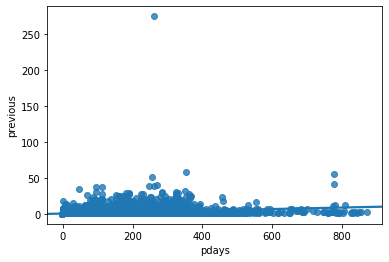

In [9]:
sns.regplot('pdays','previous',bank)  # 독립 종속을 바꿔주면 그래프 모양이 바뀐다.
# 회귀선까지 그려주는 seaborn의 함수인 regplot

In [10]:
linear_model = smf.ols(formula = 'previous ~ pdays', data = bank).fit() # 앞이 종속변수, 뒤가 독립변수

In [11]:
linear_model.summary() # 만든 모델의 요약 , summary2()로도 나타낼 수 있다. print()와 결합할 수도 있다.
# R스퀘어, F값(p값), t값(p값) 들의 확인이 중요 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               previous   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                 1.179e+04
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:19:08   Log-Likelihood:                -96636.
No. Observations:               45211   AIC:                         1.933e+05
Df Residuals:                   45209   BIC:                         1.933e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1597      0.010     15.364      0.000       0.139       0.180
pdays          0.0105   9.64e-05    108.587      0.000       0.010       0.011
==============================================================================
Omnibus:                   148535.559   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      89804625626.573
Skew:                          55.977   Prob(JB):                         0.00
Kurtosis:                    6906.603   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
print(linear_model.summary2())
# R스퀘어 값에 대한 설명 - 상관계수 제곱, 설명력

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.207      
Dependent Variable: previous         AIC:                193276.7981
Date:               2019-12-30 13:21 BIC:                193294.2363
No. Observations:   45211            Log-Likelihood:     -96636.    
Df Model:           1                F-statistic:        1.179e+04  
Df Residuals:       45209            Prob (F-statistic): 0.00       
R-squared:          0.207            Scale:              4.2084     
----------------------------------------------------------------------
               Coef.    Std.Err.      t       P>|t|    [0.025   0.975]
----------------------------------------------------------------------
Intercept      0.1597     0.0104    15.3642   0.0000   0.1394   0.1801
pdays          0.0105     0.0001   108.5868   0.0000   0.0103   0.0107
--------------------------------------------------------------------
Omnibus:          148535.559    Durbin-Wats

In [42]:
linear_model2 = smf.ols(formula = 'previous ~ age + balance  + pdays ', data=bank).fit()

In [43]:
print(linear_model2.summary())
# condition No.은 이 수치가 커질수록 약간의 변화로 값들이 달라질 수 있음을 의미(이유: 단위 다름, 다중 공선성)
# previous를 설명하기에 pdays만 있어도 된다 - 어느 조합을 해도 R스퀘어 값이 0.207이며, 조합할 경우는 F값이 오히려 떨어진다.
# 즉 pdays가 가장 크리티컬 하고 나머지 애들은 잔챙이라고 판단.

                            OLS Regression Results                            
Dep. Variable:               previous   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     3938.
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:37:12   Log-Likelihood:                -96627.
No. Observations:               45211   AIC:                         1.933e+05
Df Residuals:                   45207   BIC:                         1.933e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0498      0.039      1.287      0.1

In [17]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [63]:
linear_model3 = smf.ols(formula = 'balance ~ age + duration + campaign  + previous ', data=bank).fit()
print(linear_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     119.7
Date:                Mon, 30 Dec 2019   Prob (F-statistic):          9.04e-102
Time:                        13:46:38   Log-Likelihood:            -4.2656e+05
No. Observations:               45211   AIC:                         8.531e+05
Df Residuals:                   45206   BIC:                         8.532e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    171.3273     60.283      2.842      0.0

In [68]:
# REcode
bank['marital'].value_counts() # 각각 value가 몇개인지 확인 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [69]:
bank['marital_G'] = bank['marital'].replace(['single','married','divorced'],[1,2,3])
bank['marital_G'].head() # 결과값은 인덱스와 바뀐값을 의미 head()니까.

0    2
1    1
2    2
3    2
4    1
Name: marital_G, dtype: int64

In [70]:
bank['marital_G'].value_counts() # 바뀐거 확인 

2    27214
1    12790
3     5207
Name: marital_G, dtype: int64

In [72]:
bank['education'].value_counts() # unknown을 결측처리 해줄것이다. 아래의 None으로 REcode 함으로써. ㅏ

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [76]:
bank['education_G'] = bank['education'].replace(['primary','secondary','tertiary','unknown'],[1,2,3,None])
bank['education_G'].head()

0    3.0
1    2.0
2    2.0
3    NaN
4    NaN
Name: education_G, dtype: float64

In [78]:
bank['education_G'].value_counts()

2.0    23202
3.0    13301
1.0     6851
Name: education_G, dtype: int64

In [86]:
bank['housing_G'] = bank['housing'].replace(['yes','no'],[1,0])
bank['housing_G'].head()

0    1
1    1
2    1
3    1
4    0
Name: housing_G, dtype: int64

In [83]:
bank['housing_G'].value_counts()

1    25130
2    20081
Name: housing_G, dtype: int64

In [87]:
bank['loan_G'] = bank['loan'].replace(['yes','no'],[1,0])
bank['loan_G'].head()

0    0
1    0
2    1
3    0
4    0
Name: loan_G, dtype: int64

In [85]:
bank['loan_G'].value_counts()

2    37967
1     7244
Name: loan_G, dtype: int64

In [89]:
bank['default_G'] = bank['default'].replace(['yes','no'],[1,0])
bank['default_G'].head()

0    0
1    0
2    0
3    0
4    0
Name: default_G, dtype: int64

In [91]:
bank['contact_G'] = bank['contact'].replace(['cellular','telephone','unknown'],[1,2,None])
bank['contact_G'].tail()

45206    1.0
45207    1.0
45208    1.0
45209    2.0
45210    1.0
Name: contact_G, dtype: float64

In [93]:
bank['poutcome_G'] = bank['poutcome'].replace(['failure','success','unknown','other'],[0,1,None,None])
bank['poutcome_G'].value_counts()

0.0    4901
1.0    1511
Name: poutcome_G, dtype: int64

In [94]:
bank['y_G'] = bank['y'].replace(['yes','no'],[1,0])
bank['y_G'].value_counts()

0    39922
1     5289
Name: y_G, dtype: int64

In [97]:
bank['job_G'] = bank['job'].replace(['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'],[1,2,3,4,5,6,7,8,9,10,11,None])
bank['job_G'].value_counts()

2.0     9732
5.0     9458
10.0    7597
1.0     5171
8.0     4154
6.0     2264
7.0     1579
3.0     1487
11.0    1303
4.0     1240
9.0      938
Name: job_G, dtype: int64

In [100]:
bank['month_G'] = bank['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[1,2,3,4,5,6,7,8,9,10,11,12])
bank['month_G'].value_counts()

5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: month_G, dtype: int64

In [104]:
bank_lr = bank[['y_G','age','duration','pdays','marital_G','loan_G','contact_G']]
bank_lr.head()

,y_G,age,duration,pdays,marital_G,loan_G,contact_G
0,0,58,261,-1,2,0,NaN
1,0,44,151,-1,1,0,NaN
2,0,33,76,-1,2,1,NaN
3,0,47,92,-1,2,0,NaN
4,0,33,198,-1,1,0,NaN


In [105]:
bank_lr.info() # None값이 제외된 contact_G를 빼고 모두 데이터 개수가 45211개이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
y_G          45211 non-null int64
age          45211 non-null int64
duration     45211 non-null int64
pdays        45211 non-null int64
marital_G    45211 non-null int64
loan_G       45211 non-null int64
contact_G    32191 non-null float64
dtypes: float64(1), int64(6)
memory usage: 2.4 MB


In [108]:
bank_lr.isnull().sum() # None값만 확인

y_G              0
age              0
duration         0
pdays            0
marital_G        0
loan_G           0
contact_G    13020
dtype: int64

In [107]:
bank_lr_na = bank_lr.dropna() # None이 있는 값을 다 날려버리는 함수 

In [109]:
bank_lr_na.isnull().sum() # None을 다 날려버리고 새로 만든 데이터 셋 

y_G          0
age          0
duration     0
pdays        0
marital_G    0
loan_G       0
contact_G    0
dtype: int64

In [110]:
bank_lr_na.info() # entries 12657 to 45210 을 다시 0부터 32191까지 맞춰줘야 한다

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32191 entries, 12657 to 45210
Data columns (total 7 columns):
y_G          32191 non-null int64
age          32191 non-null int64
duration     32191 non-null int64
pdays        32191 non-null int64
marital_G    32191 non-null int64
loan_G       32191 non-null int64
contact_G    32191 non-null float64
dtypes: float64(1), int64(6)
memory usage: 2.0 MB


In [119]:
#bank_lr_na = bank_lr_na.reset_index() 위로 쭈우욱 올려서 다 정렬하기 (null값 제거해서 빈틈 채우기)
bank_lr_na.head()

,y_G,age,duration,pdays,marital_G,loan_G,contact_G
0,0,27,255,-1,1,0,1.0
1,0,54,297,-1,2,0,1.0
2,0,43,668,-1,2,1,1.0
3,0,31,65,-1,1,0,2.0
4,0,27,436,-1,1,1,1.0


In [118]:
# 위에서 index라는 열을 제거해주자
bank_lr_na = bank_lr_na.drop(['index'], axis = 1) # 자꾸 반복하면 오류난다


In [120]:
logit_model = smf.logit('y_G ~ age + duration + pdays + C(marital_G) + C(loan_G) + C(contact_G)', data=bank_lr_na).fit() # C는 이산형 # 앞으로 전진 이런거 7번 했더니 적합한 모델이 나왔다(변수조정을 7번)

Optimization terminated successfully.
         Current function value: 0.346603
         Iterations 7


In [124]:
print(logit_model.summary()) # T.2 이런 것들은 변수를 지정한 숫자를 의미함. 

                           Logit Regression Results                           
Dep. Variable:                    y_G   No. Observations:                32191
Model:                          Logit   Df Residuals:                    32183
Method:                           MLE   Df Model:                            7
Date:                Mon, 30 Dec 2019   Pseudo R-squ.:                  0.1727
Time:                        14:37:53   Log-Likelihood:                -11157.
converged:                       True   LL-Null:                       -13486.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.3394      0.071    -47.189      0.000      -3.478      -3.201
C(marital_G)[T.2]      -0.6212      0.043    -14.603      0.000      -0.705      -0.538
C(marital_G)[T.3

In [125]:
np.exp(logit_model.params) # 회귀계수의 승산과 오즈 
# age가 1만큼 커지면 y가 yes일 비율이 1.02배가 된다. 
# 2로 되어있는 결혼을 했다 라면 0.53으로 2배나 줄어든다고 보면 된다. 

Intercept              0.035458
C(marital_G)[T.2]      0.537280
C(marital_G)[T.3]      0.574948
C(loan_G)[T.1]         0.426814
C(contact_G)[T.2.0]    0.864074
age                    1.020285
duration               1.003622
pdays                  1.001959
dtype: float64

In [129]:
#predict = pd.DataFrame({'predict':logit_model.predict()}) --> 앞에서 결측값 처리를 안했을 때 인덱스가 서로 다르게 배열될 수 있음 
predict.head()

,predict
0,0.132703
1,0.141310
2,0.177187
3,0.067237
4,0.111617


In [130]:
bank_lr_na['predict'] = predict
bank_lr_na.tail()

,y_G,age,duration,pdays,marital_G,loan_G,contact_G,predict
32186,1,51,977,-1,2,0,1.0,0.644197
32187,1,71,456,-1,3,0,1.0,0.305662
32188,1,72,1127,184,2,0,1.0,0.872110
32189,0,57,508,-1,2,0,2.0,0.244623
32190,0,37,361,188,2,0,1.0,0.175879


In [131]:
# 예측확률 0.5 기준 예측그룹 생성 
def pre_group(series): 
    if series<0.5:
        return 0
    elif series>=0.5:
        return 1

In [132]:
bank_lr_na['preGroup'] = bank_lr_na['predict'].apply(pre_group)

,y_G,age,duration,pdays,marital_G,loan_G,contact_G,predict,preGroup
0,0,27,255,-1,1,0,1.0,0.132703,0
1,0,54,297,-1,2,0,1.0,0.141310,0
2,0,43,668,-1,2,1,1.0,0.177187,0
3,0,31,65,-1,1,0,2.0,0.067237,0
4,0,27,436,-1,1,1,1.0,0.111617,0


In [133]:
bank_lr_na.tail()

,y_G,age,duration,pdays,marital_G,loan_G,contact_G,predict,preGroup
32186,1,51,977,-1,2,0,1.0,0.644197,1
32187,1,71,456,-1,3,0,1.0,0.305662,0
32188,1,72,1127,184,2,0,1.0,0.872110,1
32189,0,57,508,-1,2,0,2.0,0.244623,0
32190,0,37,361,188,2,0,1.0,0.175879,0


In [135]:
pd.crosstab(bank_lr_na.y_G, bank_lr_na.preGroup, margins=True) # 직접 계산하기 힘드므로 normalize를 해줘야 한다. 

preGroup,0,1,All
y_G,,,
0,26854,578,27432
1,3885,874,4759
All,30739,1452,32191


In [136]:
pd.crosstab(bank_lr_na.y_G, bank_lr_na.preGroup, margins=True,normalize=True)
# 0과0, 1과1의 비율을 더해주면 된다.

preGroup,0,1,All
y_G,,,
0,0.834208,0.017955,0.852164
1,0.120686,0.027150,0.147836
All,0.954894,0.045106,1.000000


In [ ]:
#################################################################
#################################################################
#################################################################

In [ ]:
# loanG eduG mariG duration을 통해 로짓모델 만들기 - 모델부터 만들면 힘들고 null값 처리부터 해야한다.


In [137]:
bank_lr2 = bank[['y_G','loan_G','education_G','marital_G','duration']]
bank_lr2.head()

,y_G,loan_G,education_G,marital_G,duration
0,0,0,3.0,2,261
1,0,0,2.0,1,151
2,0,1,2.0,2,76
3,0,0,NaN,2,92
4,0,0,NaN,1,198


In [140]:
bank_lr2_na = bank_lr2.dropna()

In [141]:
bank_lr2_na.isnull().sum()

y_G            0
loan_G         0
education_G    0
marital_G      0
duration       0
dtype: int64

In [144]:
bank_lr2_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43354 entries, 0 to 43353
Data columns (total 6 columns):
index          43354 non-null int64
y_G            43354 non-null int64
loan_G         43354 non-null int64
education_G    43354 non-null float64
marital_G      43354 non-null int64
duration       43354 non-null int64
dtypes: float64(1), int64(5)
memory usage: 2.0 MB


In [143]:
bank_lr2_na = bank_lr2_na.reset_index()

In [147]:
bank_lr2_na.head()

,y_G,loan_G,education_G,marital_G,duration
0,0,0,3.0,2,261
1,0,0,2.0,1,151
2,0,1,2.0,2,76
3,0,0,3.0,2,139
4,0,1,3.0,1,217


In [146]:
bank_lr2_na = bank_lr2_na.drop(['index'], axis = 1)

In [120]:
logit_model = smf.logit('y_G ~ age + duration + pdays + C(marital_G) + C(loan_G) + C(contact_G)', data=bank_lr_na).fit() # C는 이산형 # 앞으로 전진 이런거 7번 했더니 적합한 모델이 나왔다(변수조정을 7번)

Optimization terminated successfully.
         Current function value: 0.346603
         Iterations 7


In [152]:
logit_model2 = smf.logit('y_G ~ C(loan_G) + C(education_G) + C(marital_G) + duration', data = bank_lr2_na).fit()  

Optimization terminated successfully.
         Current function value: 0.295056
         Iterations 7


In [153]:
predict2 = pd.DataFrame({'predict':logit_model2.predict()}) 
predict2.head()

,predict
0,0.116272
1,0.078248
2,0.020468
3,0.078028
4,0.071182


In [155]:
bank_lr2_na['predict'] = predict2

In [156]:
bank_lr2_na.head()

,y_G,loan_G,education_G,marital_G,duration,predict
0,0,0,3.0,2,261,0.116272
1,0,0,2.0,1,151,0.078248
2,0,1,2.0,2,76,0.020468
3,0,0,3.0,2,139,0.078028
4,0,1,3.0,1,217,0.071182


In [157]:
bank_lr2_na['preGroup'] = bank_lr2_na['predict'].apply(pre_group)

In [159]:
bank_lr2_na.tail()

,y_G,loan_G,education_G,marital_G,duration,predict,preGroup
43349,1,0,3.0,2,977,0.636759,1
43350,1,0,1.0,3,456,0.141069,0
43351,1,0,2.0,2,1127,0.665713,1
43352,0,0,2.0,2,508,0.175105,0
43353,0,0,2.0,2,361,0.110906,0


In [160]:
pd.crosstab(bank_lr2_na.y_G, bank_lr2_na.preGroup, margins=True,normalize=True)

preGroup,0,1,All
y_G,,,
0,0.870531,0.013286,0.883817
1,0.096738,0.019445,0.116183
All,0.967269,0.032731,1.000000


In [162]:
############################################
################################의사결정나무
############################################
# 과정 - Recode --> 데이터 셋 저장

In [163]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
bank_dt = bank[['y_G','age','duration','pdays','marital_G','loan_G','contact_G']].dropna()
bank_dt.head()

,y_G,age,duration,pdays,marital_G,loan_G,contact_G
12657,0,27,255,-1,1,0,1.0
12658,0,54,297,-1,2,0,1.0
12659,0,43,668,-1,2,1,1.0
12660,0,31,65,-1,1,0,2.0
12661,0,27,436,-1,1,1,1.0


In [173]:
bank_dt_na = bank_dt.reset_index()

In [174]:
bank_dt_na.head()

,index,y_G,age,duration,pdays,marital_G,loan_G,contact_G
0,12657,0,27,255,-1,1,0,1.0
1,12658,0,54,297,-1,2,0,1.0
2,12659,0,43,668,-1,2,1,1.0
3,12660,0,31,65,-1,1,0,2.0
4,12661,0,27,436,-1,1,1,1.0


In [175]:
bank_dt_na = bank_dt_na.drop(['index'], axis = 1)

In [176]:
bank_dt_na.head()

,y_G,age,duration,pdays,marital_G,loan_G,contact_G
0,0,27,255,-1,1,0,1.0
1,0,54,297,-1,2,0,1.0
2,0,43,668,-1,2,1,1.0
3,0,31,65,-1,1,0,2.0
4,0,27,436,-1,1,1,1.0


In [178]:
bank_dt_na['contact_G'] = bank_dt_na['contact_G'].astype('int') # Contact_G의 숫자들을 정수형태로 바꾸기 

In [179]:
bank_dt_na.head()

,y_G,age,duration,pdays,marital_G,loan_G,contact_G
0,0,27,255,-1,1,0,1
1,0,54,297,-1,2,0,1
2,0,43,668,-1,2,1,1
3,0,31,65,-1,1,0,2
4,0,27,436,-1,1,1,1


In [ ]:
# 데이터셋을 나눌것이다, 훈련용과 테스트용으로.

In [181]:
bank_train = bank_dt_na.loc[:,'age':] # 행에 해당하는 것 전부 가져오라는 의미.
bank_train.head() # y값만 빠진 데이터셋을 만든 것을 볼 수 있다.

,age,duration,pdays,marital_G,loan_G,contact_G
0,27,255,-1,1,0,1
1,54,297,-1,2,0,1
2,43,668,-1,2,1,1
3,31,65,-1,1,0,2
4,27,436,-1,1,1,1


In [182]:
bank_target = bank_dt_na.loc[:, 'y_G']
bank_target.head()

0    0
1    0
2    0
3    0
4    0
Name: y_G, dtype: int64

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
X_train, X_test, y_train, y_test = train_test_split(bank_train, bank_target,
                                                   test_size = 0.3, random_state=1234) #트레인이 학습용 테스트가 실제로 적용할 데이터 
# 4개의 구간으로 나눠서, 각각에 해당하는 변수를 할당하는 것이다. 

In [185]:
# 과적합된 모델 
tree_clf = DecisionTreeClassifier(random_state=1234)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_train, y_train)

0.9911685084098877

In [186]:
# 오버핏 조정
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=1234)
tree_clf.fit(X_train,y_train)
tree_clf.score(X_train, y_train)

0.8645098300270714

In [187]:
# test데이터 쓰기
from sklearn.metrics import accuracy_score

y_pred_tr = tree_clf.predict(X_test) # X-test를 통해서 예측값으로 만든 y데이터 
accuracy_score(y_test, y_pred_tr) # 그 둘을 비교 

0.8627044936839925

In [ ]:
#################
# loanG eduG mariG duraG를 이용해 tree_clf2 만들기

In [188]:
bank_dt3 = bank[['y_G','loan_G','education_G','marital_G','duration']].dropna()
bank_dt3.head()

,y_G,loan_G,education_G,marital_G,duration
0,0,0,3.0,2,261
1,0,0,2.0,1,151
2,0,1,2.0,2,76
5,0,0,3.0,2,139
6,0,1,3.0,1,217


In [194]:
bank_dt3_na = bank_dt3.dropna()

In [201]:
bank_dt3_na = bank_dt3_na.reset_index()

In [213]:
bank_dt3_na.tail()

,level_0,y_G,loan_G,education_G,marital_G,duration
43349,43349,1,0,3.0,2,977
43350,43350,1,0,1.0,3,456
43351,43351,1,0,2.0,2,1127
43352,43352,0,0,2.0,2,508
43353,43353,0,0,2.0,2,361


In [203]:
bank_dt3_na = bank_dt3_na.drop(['index'], axis = 1)

In [205]:
bank_dt3_na.tail()

,level_0,y_G,loan_G,education_G,marital_G,duration
43349,43349,1,0,3.0,2,977
43350,43350,1,0,1.0,3,456
43351,43351,1,0,2.0,2,1127
43352,43352,0,0,2.0,2,508
43353,43353,0,0,2.0,2,361


In [215]:
#bank_train2 = bank_dt3_na.loc[:,'loan_G':] # 행에 해당하는 것 전부 가져오라는 의미.
bank_train2.tail()

,loan_G,education_G,marital_G,duration
43349,0,3.0,2,977
43350,0,1.0,3,456
43351,0,2.0,2,1127
43352,0,2.0,2,508
43353,0,2.0,2,361


In [217]:
bank_target2 = bank_dt3_na.loc[:, 'y_G']
bank_target2.tail()

43349    1
43350    1
43351    1
43352    0
43353    0
Name: y_G, dtype: int64

In [218]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(bank_train2, bank_target2,test_size = 0.3, random_state=1234)

In [219]:
tree_clf2 = DecisionTreeClassifier(max_depth=4, random_state=1234)
tree_clf2.fit(X_train2,y_train2)
tree_clf2.score(X_train2, y_train2)

0.8912907371404093

In [220]:
# pip install graphviz 
# cmd에서 해도 되고 노트북에서 해도 된다. 그리고 환경변수 설정을 해줘야 한다 

Note: you may need to restart the kernel to use updated packages.


In [221]:
from sklearn.tree import export_graphviz
import graphviz

In [223]:
export_graphviz(tree_clf,
               out_file='bank_DT.dot', 
               feature_names=['age','duration','pdays','marital_G','loan_G','contact_G'],
               class_names=['no','yes'],
               filled=True) 
# tree_clf는 노드의 규칙을 갖고 있는 것

In [224]:
with open('bank_DT.dot') as f:
    dot_graph = f.read()
# bank_DT.dot는 노드규칙이 들어가있을 것이고, 이는 다시 dot_graph에 들어갈 것 

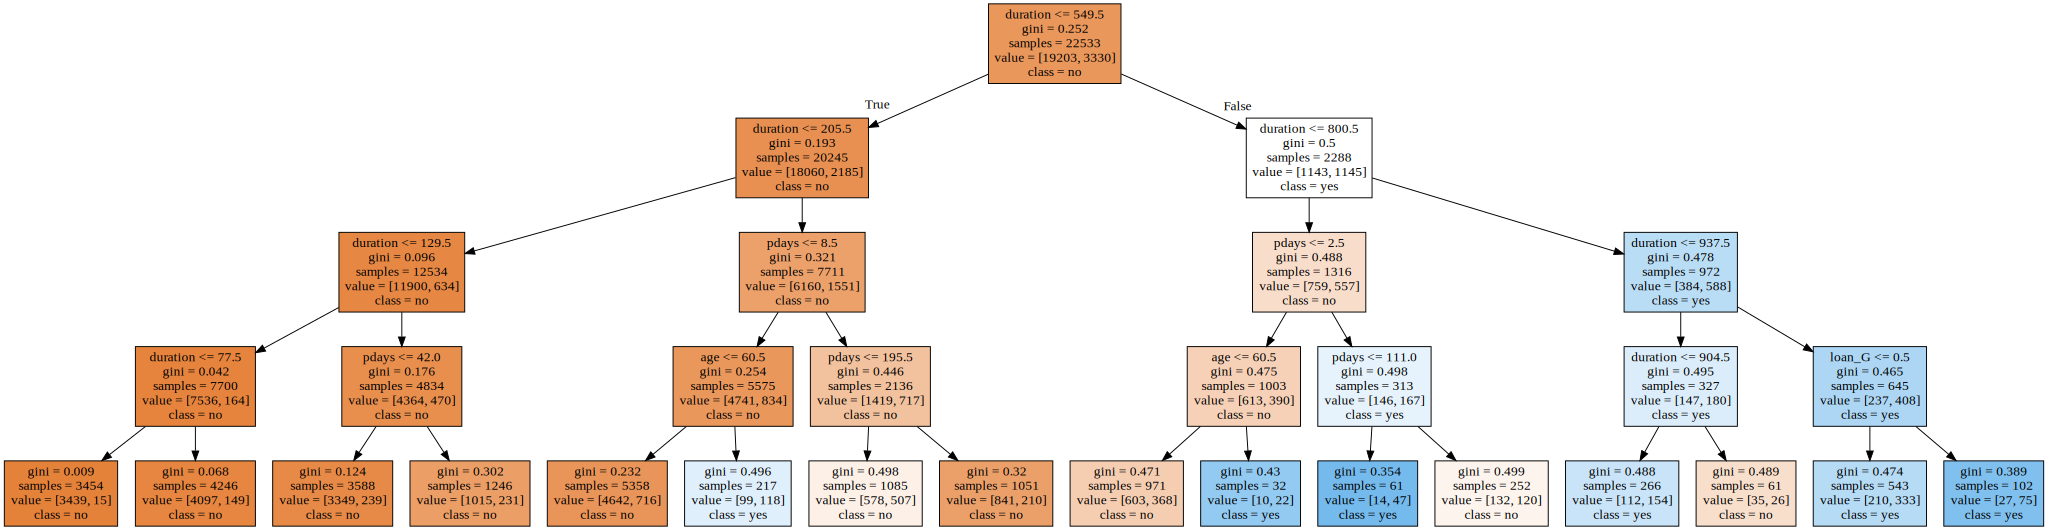

In [228]:
graphviz.Source(dot_graph)

In [227]:
# 그래프비즈 경로설정 에러 방지용
import os
os.environ['PATH'] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [229]:
# 큰 그림을 png형식으로 저장
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename = 'bank_DT')

'bank_DT.png'

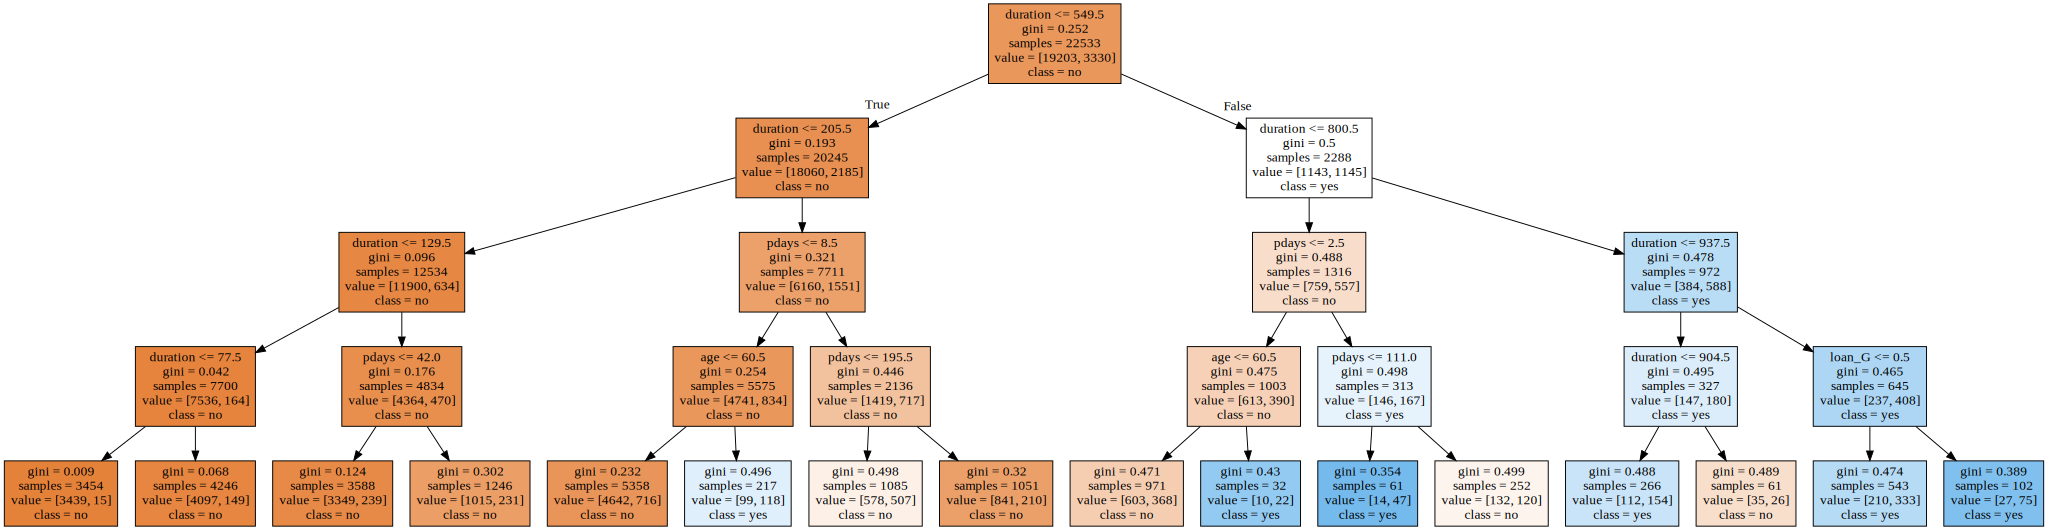

In [230]:
dot # 저장하기

In [ ]:
# 위의 그림 해석
# 지니계수는 class = no를 기준으로, 불순도를 의미함. 낮을수록 좋음. 지니계수 0.5가 최고점수(흰색바탕) 붉은색 계열들이 no, 파란색이 yes
# bank_DT.dot 은 워드파일이 있다. 분기된 것을 볼 수 있다.

In [ ]:
# loanG eduG mariG duration을 통해 y_G를 예측하는 예측모형 시각화 하기 (마지막 과제)